In [1]:
from matplotlib import pyplot as plt
import h5py
import numpy as np
from tqdm import *
from scipy import spatial

cdm = h5py.File('Data/COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5', 'r')
wdm = h5py.File('Data/COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5', 'r')

cdm_galaxy = h5py.File('Data\COLOR_CDM_galaxies.hdf5', 'r')
wdm_galaxy = h5py.File('Data\COLOR_WDM_galaxies.hdf5', 'r')

print(cdm,wdm,cdm_galaxy,wdm_galaxy)

<HDF5 file "COLOR_CDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_WDM_DM_subHaloes_z0.00_v2.hdf5" (mode r)> <HDF5 file "COLOR_CDM_galaxies.hdf5" (mode r)> <HDF5 file "COLOR_WDM_galaxies.hdf5" (mode r)>


# Access the masses and positions of CDM and WDM halos

In [2]:
# Access mass/position for wdm/cdm
print(list(cdm.keys()),list(wdm.keys()))

cdm_mass = cdm['SubhaloMass'][:]
cdm_position = cdm['SubhaloPos'][:]

wdm_mass = wdm['SubhaloMass'][:]
wdm_position = wdm['SubhaloPos'][:]

cdm_mass, cdm_position, wdm_mass, wdm_position

['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos'] ['IsCentral', 'R200', 'SubhaloMass', 'SubhaloPos']


(array([1.87617493e+14, 1.84468594e+14, 6.89978024e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[10.93832207, 81.23078918, 54.77935028],
        [17.94562721, 79.86347961, 53.3843956 ],
        [15.62266159, 78.18474579, 52.83857346],
        ...,
        [ 1.47748184,  3.54455233, 99.53264618],
        [99.32190704,  2.56014371,  2.57368279],
        [99.0621109 ,  4.18381071,  2.89533401]]),
 array([1.89941540e+14, 1.86912732e+14, 6.83256610e+13, ...,
        1.76011232e+08, 1.76011232e+08, 1.76011232e+08]),
 array([[1.80150642e+01, 7.98655701e+01, 5.34328232e+01],
        [1.09048624e+01, 8.12610779e+01, 5.48179703e+01],
        [1.56323385e+01, 7.81665344e+01, 5.28157997e+01],
        ...,
        [6.02296066e+00, 5.05078554e+00, 9.79758301e+01],
        [5.75055540e-01, 3.26677370e+00, 3.52767438e-01],
        [2.07897183e-03, 3.23730040e+00, 9.97708917e-01]]))

### Filter out halos below the resolution limit

In [6]:
m_res = 8.8*10**6*50
m_res

440000000.0

In [7]:
cdm_filtered_ind=np.where(cdm_mass>m_res)[0]
wdm_filtered_ind=np.where(wdm_mass>m_res)[0]

len(cdm_position),len(cdm_filtered_ind),len(wdm_position),len(wdm_filtered_ind)

(4770041, 2098590, 3082275, 1408939)

In [8]:
#access the filtered positions
cdm_position_filtered=cdm_position[cdm_filtered_ind]
wdm_position_filtered=wdm_position[wdm_filtered_ind]

#and the filtered masses
cdm_mass_filtered=cdm_mass[cdm_filtered_ind]
wdm_mass_filtered=wdm_mass[wdm_filtered_ind]

len(cdm_mass_filtered)

2098590

# Access the masses and positions of CDM and WDM galaxies

In [9]:
print(list(cdm_galaxy.keys()),list(wdm_galaxy.keys()))

cdm_galaxy_position = cdm_galaxy['GalaxyPos'][:]
wdm_galaxy_position = wdm_galaxy['GalaxyPos'][:]

cdm_galaxy_position, wdm_galaxy_position

['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass'] ['Colour', 'GalaxyPos', 'IsCentral', 'StellarMass']


(array([[17.43208122, 80.25539398, 54.00876999],
        [17.43210793, 80.22522736, 53.97425079],
        [19.06316185, 80.02703857, 54.18655014],
        ...,
        [67.22305298, 64.69418335, 36.19010544],
        [ 7.28926134, 78.05925751, 49.41135025],
        [ 6.75961494, 77.04682159, 48.55372238]]),
 array([[17.61932182, 79.06235504, 52.68593979],
        [18.65647697, 80.58162689, 52.30108261],
        [18.58250046, 80.91363525, 52.45199203],
        ...,
        [76.68208313, 28.50509262, 59.96631622],
        [33.62237167,  9.74790382,  4.82571173],
        [52.58901978, 44.79496765, 78.47211456]]))

# Calculate the mass within a sphere

In [10]:
#create the trees
cdm_filtered_tree = spatial.cKDTree(cdm_position_filtered)
wdm_filtered_tree = spatial.cKDTree(wdm_position_filtered)

### First do CDM

In [11]:
# create an empty array for the mass of the spheres
cdm_5Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(cdm_galaxy_position)):
    
    #find the indices of all central halos in a 5 Mpc radius around each galaxy
    ind = cdm_filtered_tree.query_ball_point(cdm_galaxy_position[i], 5)
    
    #sum the masses of these halos
    cdm_5Mpc_sphere_mass.append(np.sum(cdm_mass_filtered[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 661632/661632 [21:26<00:00, 514.38it/s]


In [12]:
cdm_5Mpc_sphere_mass=np.array(cdm_5Mpc_sphere_mass)
np.savetxt("Calculations/cdm_5Mpc_sphere_mass_filtered.txt", cdm_5Mpc_sphere_mass, fmt = "%f")
len(cdm_5Mpc_sphere_mass), len(cdm_galaxy_position)

(661632, 661632)

In [13]:
# create an empty array for the mass of the spheres
cdm_10Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(cdm_galaxy_position)):
    
    #find the indices of all central halos in a 10 Mpc radius around each galaxy
    ind = cdm_filtered_tree.query_ball_point(cdm_galaxy_position[i], 10)
    
    #sum the masses of these halos
    cdm_10Mpc_sphere_mass.append(np.sum(cdm_mass_filtered[ind]))

100%|███████████████████████████████████████████████████████████████████████| 661632/661632 [1:08:53<00:00, 160.08it/s]


In [14]:
cdm_10Mpc_sphere_mass=np.array(cdm_10Mpc_sphere_mass)
np.savetxt("Calculations/cdm_10Mpc_sphere_mass_filtered.txt", cdm_10Mpc_sphere_mass, fmt = "%f")
len(cdm_10Mpc_sphere_mass), len(cdm_galaxy_position)

(661632, 661632)

### Then WDM

In [15]:
# create an empty array for the mass of the spheres
wdm_5Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(wdm_galaxy_position)):
    
    #find the indices of all central halos in a 5 Mpc radius around each galaxy
    ind = wdm_filtered_tree.query_ball_point(wdm_galaxy_position[i], 5)
    
    #sum the masses of these halos
    wdm_5Mpc_sphere_mass.append(np.sum(wdm_mass_filtered[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 477870/477870 [10:47<00:00, 738.31it/s]


In [16]:
wdm_5Mpc_sphere_mass=np.array(wdm_5Mpc_sphere_mass)
np.savetxt("Calculations/wdm_5Mpc_sphere_mass_filtered.txt", wdm_5Mpc_sphere_mass, fmt = "%f")
len(wdm_5Mpc_sphere_mass), len(wdm_galaxy_position)

(477870, 477870)

In [17]:
# create an empty array for the mass of the spheres
wdm_10Mpc_sphere_mass = []

#iterate through each galaxy
for i in trange(len(wdm_galaxy_position)):
    
    #find the indices of all central halos in a 10 Mpc radius around each galaxy
    ind = wdm_filtered_tree.query_ball_point(wdm_galaxy_position[i], 10)
    
    #sum the masses of these halos
    wdm_10Mpc_sphere_mass.append(np.sum(wdm_mass_filtered[ind]))

100%|█████████████████████████████████████████████████████████████████████████| 477870/477870 [34:52<00:00, 228.38it/s]


In [18]:
wdm_10Mpc_sphere_mass=np.array(wdm_10Mpc_sphere_mass)
np.savetxt("Calculations/wdm_10Mpc_sphere_mass_filtered.txt", wdm_10Mpc_sphere_mass, fmt = "%f")
len(wdm_10Mpc_sphere_mass), len(wdm_galaxy_position)

(477870, 477870)

# Calculate the envelope mass

In [19]:
cdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_5Mpc_sphere_mass_filtered.txt")
wdm_5Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_5Mpc_sphere_mass_filtered.txt")

In [20]:
cdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/cdm_10Mpc_sphere_mass_filtered.txt")
wdm_10Mpc_sphere_mass = np.genfromtxt("Calculations/wdm_10Mpc_sphere_mass_filtered.txt")

In [21]:
cdm_envelope_mass=cdm_10Mpc_sphere_mass-cdm_5Mpc_sphere_mass
wdm_envelope_mass=wdm_10Mpc_sphere_mass-wdm_5Mpc_sphere_mass
len(cdm_envelope_mass),len(wdm_envelope_mass),cdm_envelope_mass, wdm_envelope_mass

(661632, 477870, array([5.29543271e+14, 5.29879347e+14, 5.48000056e+14, ...,
        7.09475586e+13, 7.22646416e+14, 6.72348636e+14]), array([5.61700612e+14, 5.19950930e+14, 5.67300725e+14, ...,
        1.25458107e+14, 8.05311434e+13, 4.94819599e+13]))

# Compare the total galaxy abundance

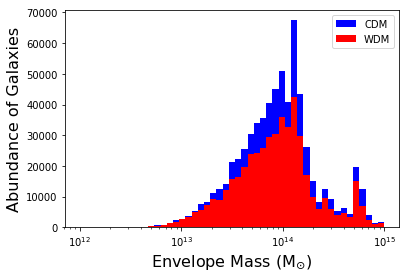

In [22]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
plt.hist(cdm_envelope_mass,bins=bins,label='CDM',color='blue')
plt.hist(wdm_envelope_mass,bins=bins,label='WDM',color='red')
plt.xlabel("Envelope Mass (M$_{\odot}$)", fontsize=16)
plt.ylabel('Abundance of Galaxies',fontsize=16)
plt.xscale("Log")
plt.legend()
plt.show()

### Split the environment into the top 20% and bottom 20%

In [23]:
frac = 20.0
th_low_cdm = np.percentile(cdm_envelope_mass,frac)
th_top_cdm = np.percentile(cdm_envelope_mass,100.-frac)
th_low_wdm = np.percentile(wdm_envelope_mass,frac)
th_top_wdm = np.percentile(wdm_envelope_mass,100.-frac)

cdm_top_envelope_mass = cdm_envelope_mass[cdm_envelope_mass>th_top_cdm]
cdm_low_envelope_mass = cdm_envelope_mass[cdm_envelope_mass<th_low_cdm]
wdm_top_envelope_mass = wdm_envelope_mass[wdm_envelope_mass>th_top_wdm]
wdm_low_envelope_mass = wdm_envelope_mass[wdm_envelope_mass<th_low_wdm]

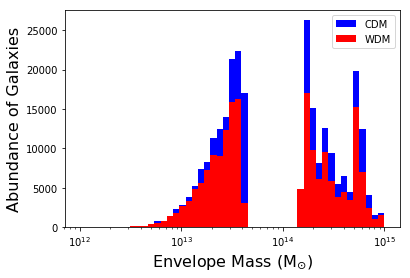

In [24]:
bins=np.logspace(np.log10(1e12),np.log10(1e15), 50)
N_cdm_top,bins_cdm_top,patches_cdm_top=plt.hist(cdm_top_envelope_mass, bins=bins,label='CDM',color='blue')
N_cdm_low,bins_cdm_low,patches_cdm_low=plt.hist(cdm_low_envelope_mass,bins=bins,color='blue')
N_wdm_top,bins_wdm_top,patches_wdm_top=plt.hist(wdm_top_envelope_mass, bins=bins,label='WDM',color='red')
N_wdm_low,bins_wdm_low,patches_wdm_low=plt.hist(wdm_low_envelope_mass,bins=bins,color='red')
plt.xlabel("Envelope Mass (M$_{\odot}$)", fontsize=16)
plt.ylabel('Abundance of Galaxies',fontsize=16)
plt.xscale("Log")
plt.legend()
plt.show()

### Total galaxies in the least dense environments

In [25]:
print('CDM:',np.sum(N_cdm_low))
print('WDM:',np.sum(N_wdm_low))

CDM: 132319.0
WDM: 95565.0


### Total galaxies in the most dense environments

In [26]:
print('CDM:',np.sum(N_cdm_top))
print('WDM:',np.sum(N_wdm_low))

CDM: 127556.0
WDM: 95565.0
